## Bank Loan Approval

###  EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('loan_data.csv')

# Show first few rows
df.head()

ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

#### Summary Statistics
##### Shows mean, median, min, max, std for numerical columns to understand overall distribution and detect anomalies.


In [3]:
df.describe()

ID          Age   Experience       Income      ZIP.Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal.Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities.Account  CD.Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

#### Data Types & Unique Value Counts
##### Shows each column’s data type and how many unique values it has to identify numeric vs categorical columns and check for useless columns.

In [4]:
print(df.dtypes)           
print(df.nunique())        


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP.Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
dtype: int64


#### Check for Missing Values
##### Checks for blank or NaN (Not a Number) cells as Missing values can break the model. 

In [5]:
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

#### Outlier Detection – Box Plots
##### Visualizes extreme values in numeric columns as Outliers can mislead model training.

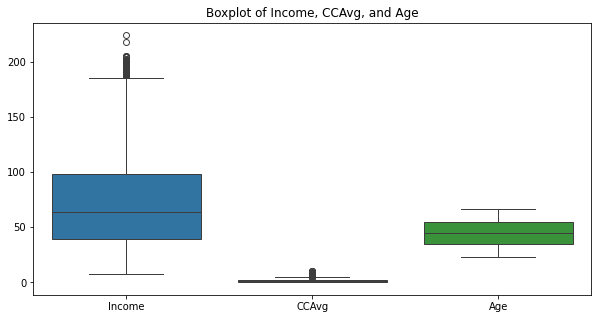

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Income', 'CCAvg', 'Age']])
plt.title("Boxplot of Income, CCAvg, and Age")
plt.show()


#### Histograms – Distribution of Numeric Columns
##### Shows how values are spread as it Helps understand skewness or gaps in data.




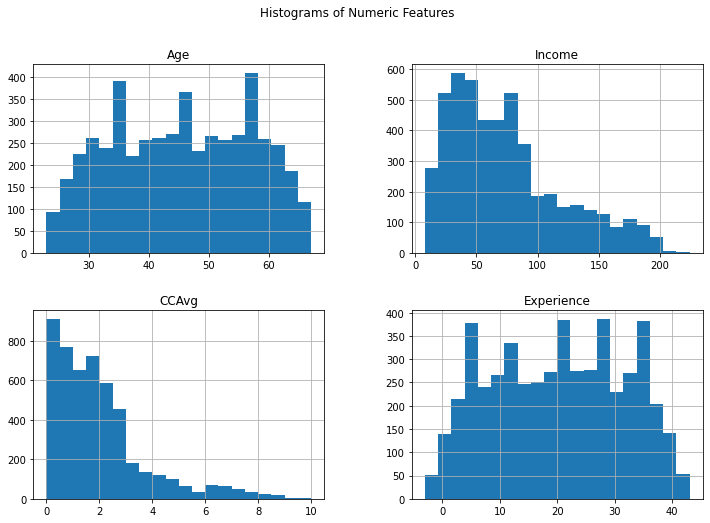

In [7]:
df[['Age', 'Income', 'CCAvg', 'Experience']].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numeric Features")
plt.show()


#### Correlation Heatmap
##### Shows how features relate (positively or negatively) to Help identify features that may influence the target (Personal Loan).

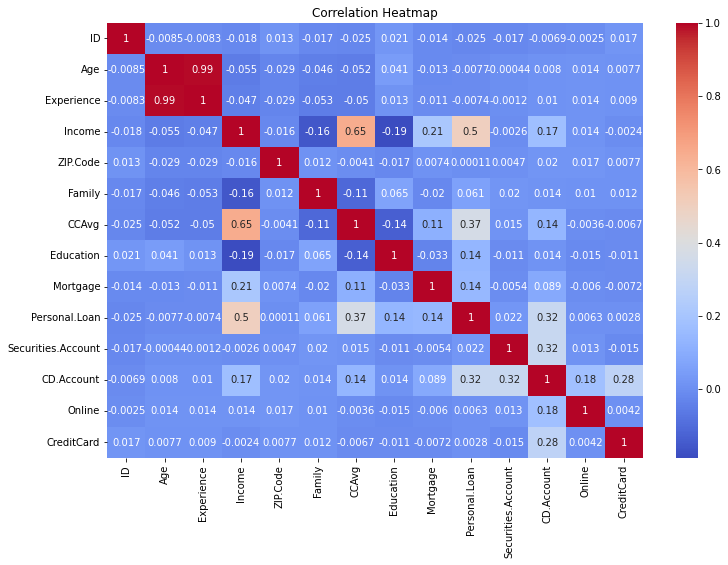

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### Bar Plots – Categorical Features
##### Shows counts of different values in categorical columns to Understand how many customers fall into each category.

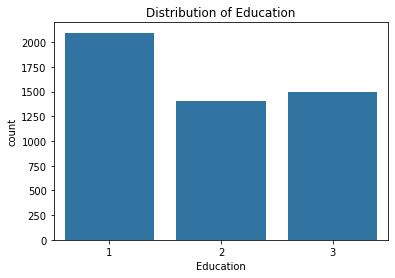

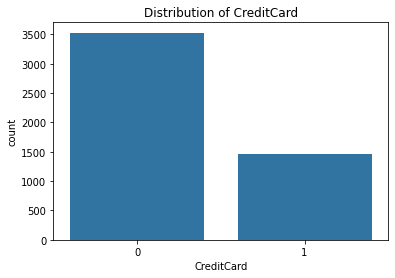

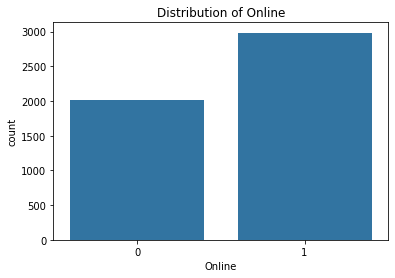

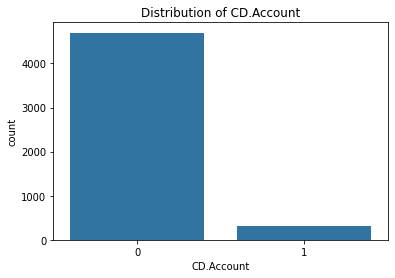

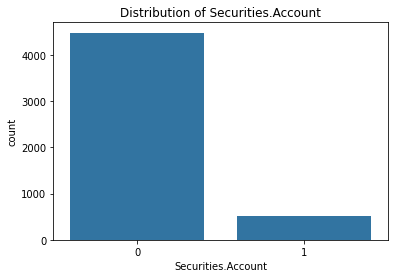

In [9]:
categorical_cols = ['Education', 'CreditCard', 'Online', 'CD.Account', 'Securities.Account']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


#### Family Size vs Loan Approval – Grouped Bar Chart
##### Compares loan approvals across family sizes as  May reveal patterns (e.g., bigger families take more loans).

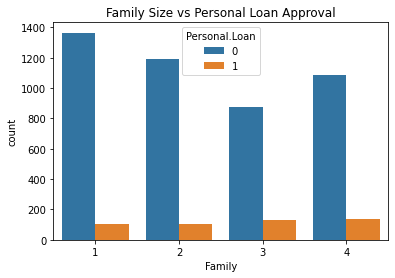

In [10]:
sns.countplot(x='Family', hue='Personal.Loan', data=df)
plt.title("Family Size vs Personal Loan Approval")
plt.show()


#### ZIP Code vs Loan Approval (Optional)
##### Sees if people from certain areas are more likely to take loans as Location may influence behavior.

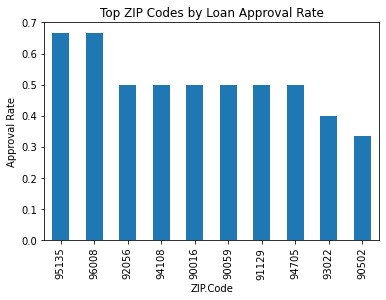

In [11]:
zip_loan = df.groupby('ZIP.Code')['Personal.Loan'].mean().sort_values(ascending=False).head(10)
zip_loan.plot(kind='bar', title="Top ZIP Codes by Loan Approval Rate")
plt.ylabel("Approval Rate")
plt.show()


#### Pair Plots
##### Shows scatterplots between features as it Helps find patterns, clusters, or separation between loan and non-loan takers.

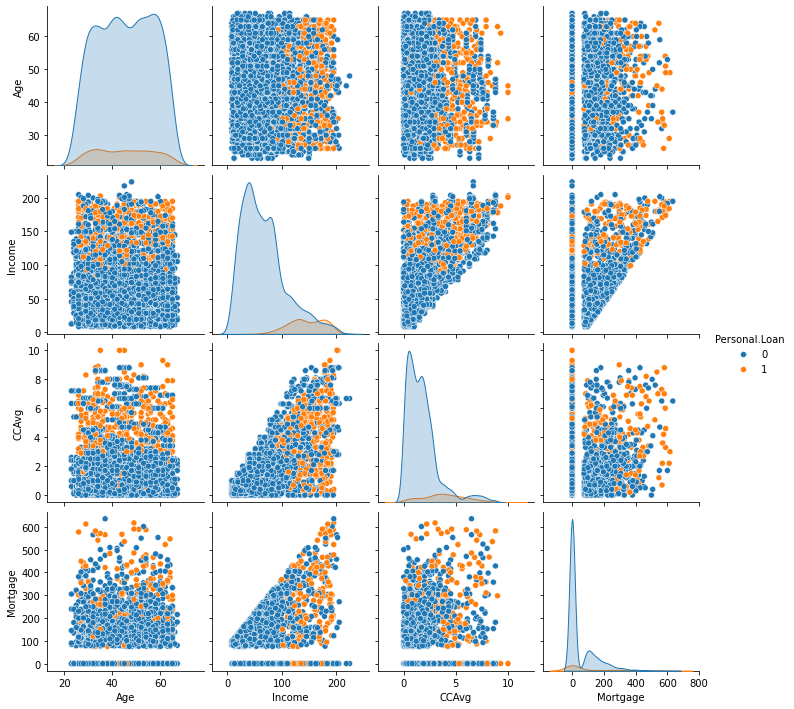

In [12]:
sns.pairplot(df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal.Loan']], hue='Personal.Loan')
plt.show()


#### Target Variable Distribution – Loan Approved or Not
##### Shows how many customers got the loan as it Helps detect imbalance in the dataset.

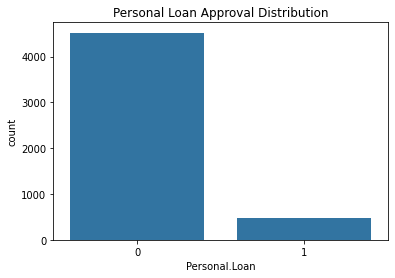

In [13]:
sns.countplot(x='Personal.Loan', data=df)
plt.title("Personal Loan Approval Distribution")
plt.show()


#### Loan Approval vs Online/CD/CreditCard Status
##### Compares loan status with account status as People with CDs or Credit Cards may have higher chances of loan approval.

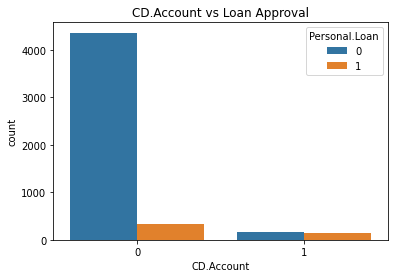

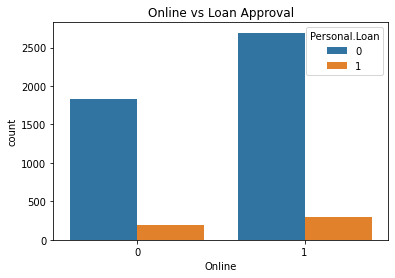

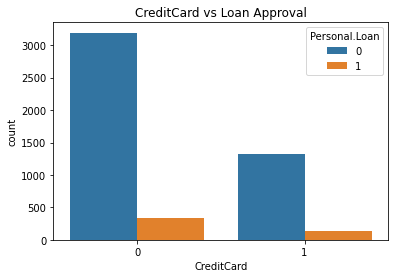

In [14]:
features = ['CD.Account', 'Online', 'CreditCard']
for col in features:
    sns.countplot(x=col, hue='Personal.Loan', data=df)
    plt.title(f'{col} vs Loan Approval')
    plt.show()


#### Education Level vs Income
##### Compares income based on education level as Education might influence income and loan approval.

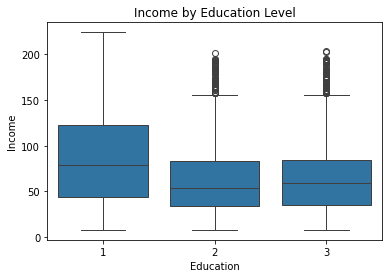

In [15]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title("Income by Education Level")
plt.show()


#### Income vs Loan Status
##### Compares income distribution for people who took loans vs not as You may find people with higher income take more loans.


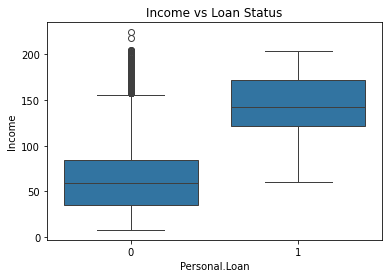

In [16]:
sns.boxplot(x='Personal.Loan', y='Income', data=df)
plt.title("Income vs Loan Status")
plt.show()


## DATA PREPROCESSING

#### Drop Unnecessary Columns
##### ID and ZIP Code are not useful for predicting loans.

In [18]:
df = df.drop(['ID', 'ZIP.Code'], axis=1)


#### Handle Missing Values
##### As Machine learning models don’t work well with missing values.

In [19]:
df.isnull().sum()


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

#### Encode Categorical Features
##### A Machine learning needs numbers, not text. Education is already numeric (1, 2, 3), so you’re fine.

In [21]:
#df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
# No categorical column like 'Gender' to encode
# 'Education' is already numeric (1, 2, 3) — no need to encode it now

#### Scale/Normalize Numeric Columns
##### ML models (especially KNN, SVM, Logistic Regression) work better if features are on a similar scale.Scaling these: Age, Experience, Income, CCAvg, Mortgage

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


#### Train-Test Split
#### To evaluate the model fairly on unseen data.Spliting  dataset into: 80% training, 20% testing

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal.Loan', axis=1)  # Features
y = df['Personal.Loan']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
df.to_csv("cleaned_dataset.csv", index=False)


#### Apply Machine Learning Models

In [7]:
# train_model.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
try:
    data = pd.read_csv("cleaned_dataset.csv")
    print("Columns in dataset:", data.columns.tolist())
    
    # Ensure target column exists
    if 'Personal.Loan' not in data.columns:
        raise ValueError("Target column 'Personal.Loan' not found in dataset")
    
    X = data.drop("Personal.Loan", axis=1)
    y = data["Personal.Loan"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize models with compatible parameters
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42)
    }
    
    # Train & evaluate models
    best_model = None
    best_accuracy = 0
    best_model_name = ""
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        
        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.2f}")
        print(classification_report(y_test, y_pred))
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = name
    
    # Save the best model
    if best_model:
        joblib.dump(best_model, "best_model.pkl")
        print(f"\n✅ Best model saved: {best_model_name} (Accuracy: {best_accuracy:.2f})")
        
        # Save evaluation metrics
        joblib.dump(results, "model_results.pkl")
        
        # Plot feature importance if tree-based model
        if hasattr(best_model, 'feature_importances_'):
            plt.figure(figsize=(10, 6))
            feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
            feat_importances.nlargest(10).sort_values().plot(kind='barh')
            plt.title('Top 10 Feature Importances')
            plt.savefig('feature_importance.png')
            plt.close()
            
    else:
        print("\n❌ No model was saved.")
        
except Exception as e:
    print(f"\n⚠️ Error: {str(e)}")

Columns in dataset: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']

Logistic Regression Results:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000


Decision Tree Results:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.93      0.94       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000


Random Forest Results:
Accuracy: 0.99
              precision    recall  f1-score   supp

In [1]:
import sklearn
print("Jupyter sklearn version:", sklearn.__version__)

Jupyter sklearn version: 1.3.2
